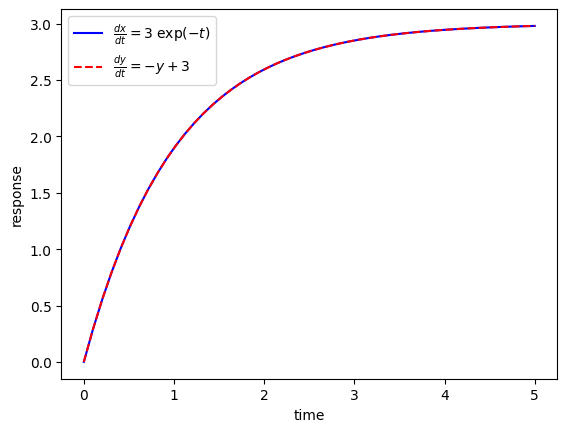

In [278]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# time points
t = np.linspace(0,5)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

1.2244897959183674


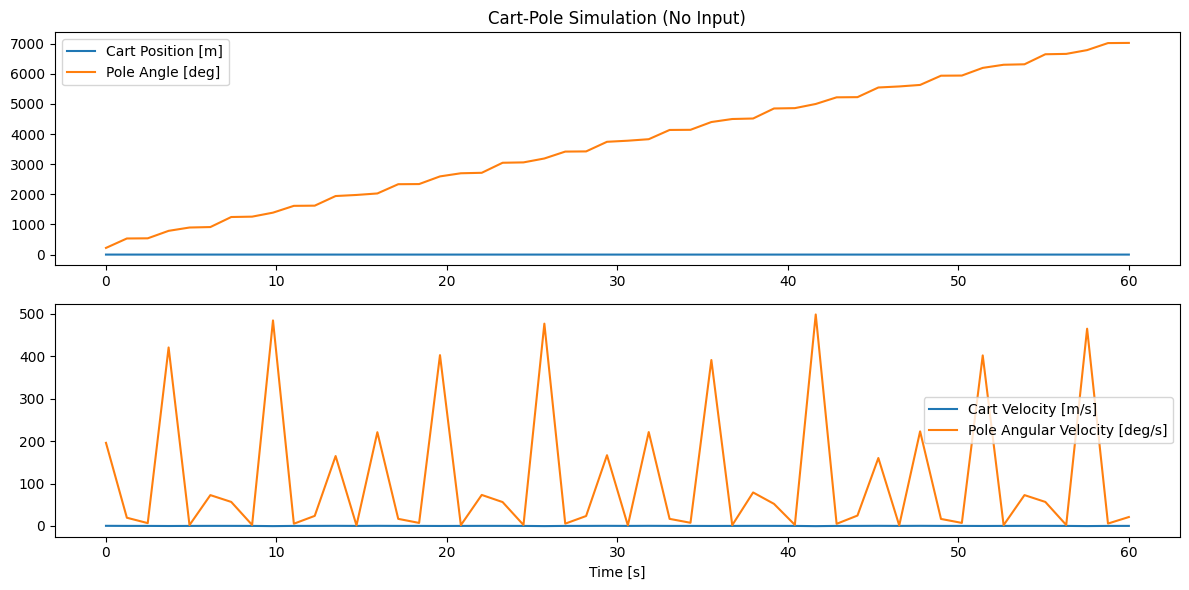

In [279]:
from scipy.integrate import odeint
import numpy as np

def cart_pole_nonlin(x, t):
    u = 0
    s, ds, theta, dtheta = x
    F = u
    M = 1 # Mass of cart
    m = 0.2 # mass of pole
    l = 0.5 # half length of pole
    g = 9.81
    
    dds = F + m*np.sin(theta)*(l*dtheta**2 + g*np.cos(theta)) / (M + m*np.sin(theta)**2)
    ddtheta = (-F*np.cos(theta) - m*l*dtheta**2 * np.cos(theta)*np.sin(theta) - (M+m)*g*np.sin(theta)) / (l*((M + m*np.sin(theta)**2)))

    dxdt = [ds, dds, dtheta, ddtheta]
    return dxdt

ts = np.linspace(0, 60)
dt = ts[1] - ts[0]
print(dt)
xs = np.zeros((4, len(ts)))

x = [2, 0, np.pi, 0.02]

for k, t in enumerate(ts):
    if k == 0:
        pass

    uk = 0
    x = odeint(cart_pole_nonlin, x, [0, dt])[1]
    #x = odeint(cart_pole, x, [ts[k-1], ts[k]])[1]
    xs[:, k] = x

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(ts, xs[0], label='Cart Position [m]')
plt.plot(ts, np.rad2deg(xs[2]), label='Pole Angle [deg]')
plt.title("Cart-Pole Simulation (No Input)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ts, xs[1], label='Cart Velocity [m/s]')
plt.plot(ts, np.rad2deg(xs[3]), label='Pole Angular Velocity [deg/s]')
plt.xlabel("Time [s]")
plt.legend()

plt.tight_layout()
plt.show()


In [280]:
import sympy as sp

# Define symbols
s, ds, th, dth, u = sp.symbols('s ds th dth u')
M, m, l, g = sp.symbols('M m l g')

# State vector
x = sp.Matrix([s, ds, th, dth])

# Define nonlinear dynamics f(x, u)
F = u
sin_th = sp.sin(th)
cos_th = sp.cos(th)
den = M + m * sin_th**2

dds = (F + m * sin_th * (l * dth**2 + g * cos_th)) / den
ddth = (-F * cos_th - m * l * dth**2 * cos_th * sin_th - (M + m) * g * sin_th) / (l * den)

f = sp.Matrix([ds, dds, dth, ddth])  # dx/dt = f(x, u)

# Linearize about upright position: x_eq = [0, 0, pi, 0], u = 0
x_eq = [0, 0, sp.pi, 0]
u_eq = 0

# Jacobians
A_sym = f.jacobian(x)
B_sym = f.jacobian([u])

# Substitute equilibrium
subs_dict = {
    s: x_eq[0],
    ds: x_eq[1],
    th: x_eq[2],
    dth: x_eq[3],
    u: u_eq,
    M: 1.0,
    m: 0.2,
    l: 0.5,
    g: 9.81
}

A_lin = A_sym.subs(subs_dict).evalf()
B_lin = B_sym.subs(subs_dict).evalf()

# Display A and B
sp.pprint(A_lin)
sp.pprint(B_lin)



⎡0  1.0    0      0 ⎤
⎢                   ⎥
⎢0   0   1.962    0 ⎥
⎢                   ⎥
⎢0   0     0     1.0⎥
⎢                   ⎥
⎣0   0   23.544   0 ⎦
⎡ 0 ⎤
⎢   ⎥
⎢1.0⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣2.0⎦


In [281]:
A = np.array([[0, 1.0, 0, 0],
              [0, 0, 1.962, 0],
              [0, 0, 0 , 1.0],
              [0, 0, 23.554, 0]])

B = np.array([[0], [1.0], [0], [2.0]])

In [282]:
import numpy as np
from scipy.signal import place_poles

# Desired poles — stable and fast
desired_poles = [-2.0, -2.1, -2.2, -2.3]
K = place_poles(A, B, desired_poles).gain_matrix

print("K =")
print(K)


K =
[[-1.08262863 -2.01966378 26.17331431  5.30983189]]


C:\Users\jmlgr\AppData\Local\Temp\ipykernel_2640\1113849154.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uk = max(-2.0, min(2.0, float(-K @ x)))


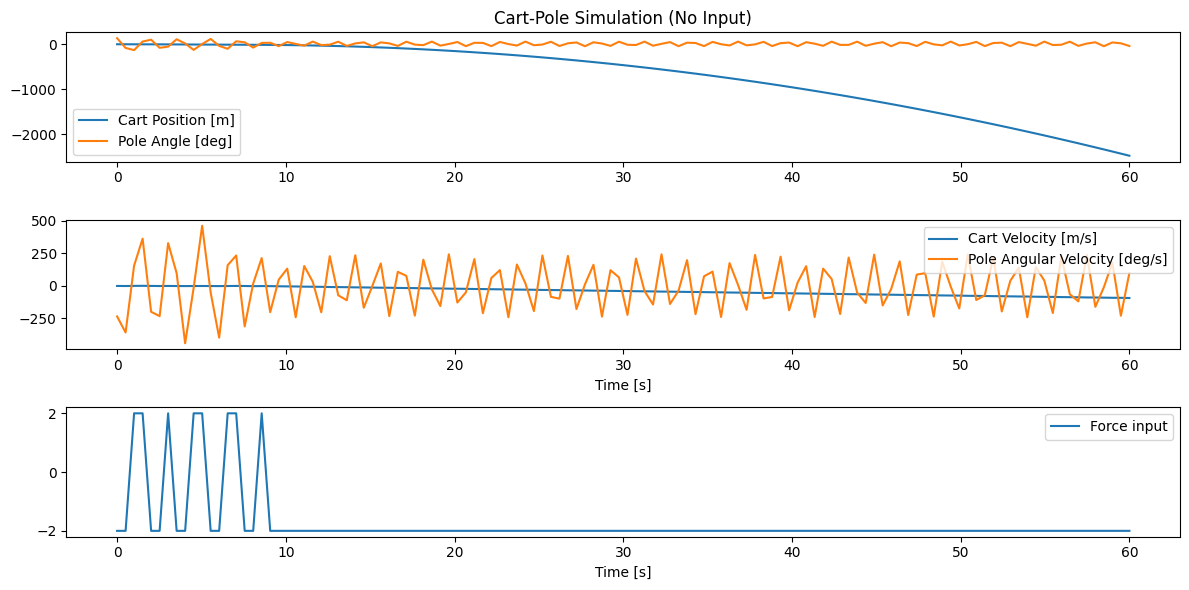

In [283]:
from scipy.integrate import odeint
import numpy as np

def cart_pole_nonlin(x, t, u):
    s, ds, theta, dtheta = x
    F = u
    M = 1 # Mass of cart
    m = 0.2 # mass of pole
    l = 0.5 # half length of pole
    g = 9.81
    
    dds = F + m*np.sin(theta)*(l*dtheta**2 + g*np.cos(theta)) / (M + m*np.sin(theta)**2)
    ddtheta = (-F*np.cos(theta) - m*l*dtheta**2 * np.cos(theta)*np.sin(theta) - (M+m)*g*np.sin(theta)) / (l*((M + m*np.sin(theta)**2)))

    dxdt = [ds, dds, dtheta, ddtheta]
    return dxdt

ts = np.linspace(0, 60, 120)
xs = np.zeros((4, len(ts)))
us = np.zeros(len(ts))

x = np.array([2, 0, np.pi, 0.02])  # shape (4,)
dt = ts[1] - ts[0]

for k, t in enumerate(ts):
    if k == 0:
        pass

    uk = max(-2.0, min(2.0, float(-K @ x)))
    x = odeint(cart_pole_nonlin, x, [0, dt], args=(uk,))[1]
    #x = odeint(cart_pole, x, [ts[k-1], ts[k]])[1]
    xs[:, k] = x
    us[k] = uk

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(ts, xs[0], label='Cart Position [m]')
plt.plot(ts, np.rad2deg(xs[2]), label='Pole Angle [deg]')
plt.title("Cart-Pole Simulation (No Input)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ts, xs[1], label='Cart Velocity [m/s]')
plt.plot(ts, np.rad2deg(xs[3]), label='Pole Angular Velocity [deg/s]')
plt.xlabel("Time [s]")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(ts, us, label='Force input')
plt.xlabel("Time [s]")
plt.legend()

plt.tight_layout()
plt.show()


In [284]:
from scipy.linalg import solve_continuous_are

# Tuning matrices
Q = np.diag([10, 1, 100, 1])  # penalize cart pos and pole angle
R = np.array([[1]])          # penalize input energy

# Solve ARE
P = solve_continuous_are(A, B, Q, R)

# Compute LQR gain
K = np.linalg.inv(R) @ B.T @ P

print("LQR gain K:")
print(K)


LQR gain K:
[[-3.16227766 -4.47745032 41.3366774   8.64228187]]


C:\Users\jmlgr\AppData\Local\Temp\ipykernel_2640\3115420114.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uk = max(-2.0, min(2.0, float(-K @ x)))


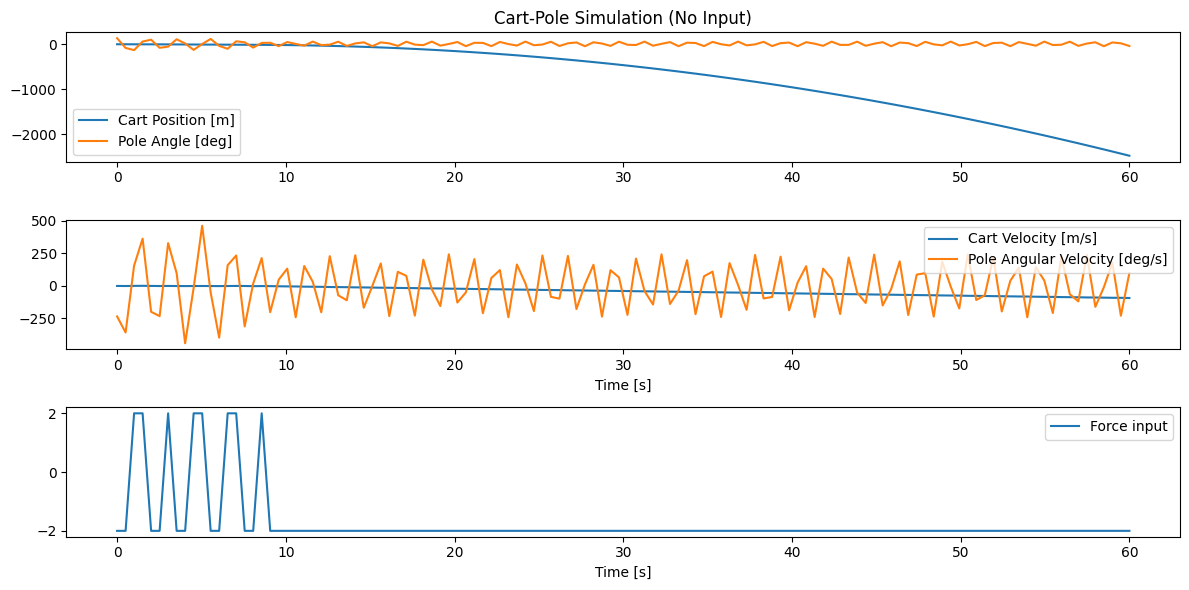

In [285]:
from scipy.integrate import odeint
import numpy as np

ts = np.linspace(0, 60, 120)
xs = np.zeros((4, len(ts)))
us = np.zeros(len(ts))

x = np.array([2, 0, np.pi, 0.02])  # shape (4,)
dt = ts[1] - ts[0]

for k, t in enumerate(ts):
    if k == 0:
        pass

    uk = max(-2.0, min(2.0, float(-K @ x)))
    x = odeint(cart_pole_nonlin, x, [0, dt], args=(uk,))[1]
    #x = odeint(cart_pole, x, [ts[k-1], ts[k]])[1]
    xs[:, k] = x
    us[k] = uk

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(ts, xs[0], label='Cart Position [m]')
plt.plot(ts, np.rad2deg(xs[2]), label='Pole Angle [deg]')
plt.title("Cart-Pole Simulation (No Input)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ts, xs[1], label='Cart Velocity [m/s]')
plt.plot(ts, np.rad2deg(xs[3]), label='Pole Angular Velocity [deg/s]')
plt.xlabel("Time [s]")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(ts, us, label='Force input')
plt.xlabel("Time [s]")
plt.legend()

plt.tight_layout()
plt.show()


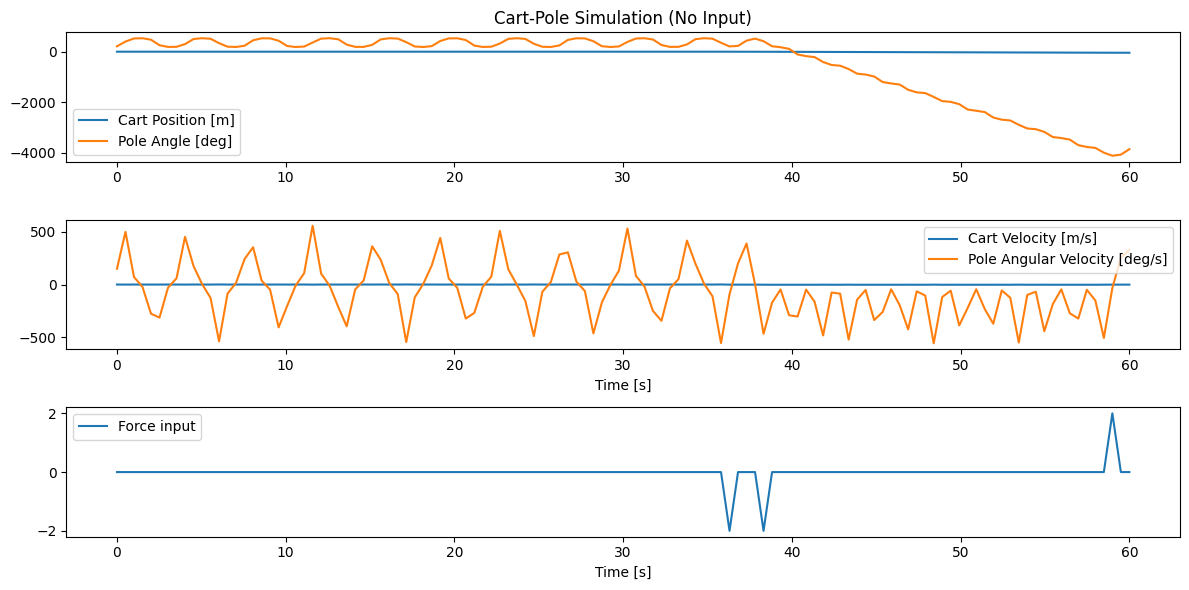

In [286]:
from scipy.optimize import minimize

# Define the MPC objective function again
def mpc_cost(u_seq, x0, A, B, N, r_seq, lambda_u):
    cost = 0.0
    x = np.copy(x0)
    for i in range(N):
        u = u_seq[i]
        x = A @ x + B.flatten() * u
        cost += np.sum((x - r_seq[i])**2) + lambda_u * u**2
    return cost

def solve_mpc(x0, r, A, B, N=2, lambda_u=0.1):
    r_seq = [r] * N
    u_init = np.zeros(N)
    bounds = [(-2, 2)] * N
    res = minimize(mpc_cost, u_init, args=(x0, A, B, N, r_seq, lambda_u), bounds=bounds, method='SLSQP')
    u = res.x[0]
    return u

from scipy.integrate import odeint
import numpy as np

ts = np.linspace(0, 60, 120)
xs = np.zeros((4, len(ts)))
us = np.zeros(len(ts))

x = np.array([0.0, 0.0, np.pi + 0.1, 0.0])  # shape (4,)
dt = ts[1] - ts[0]
N = 10
r_seq = [np.zeros_like(x)] * N

for k, t in enumerate(ts):
    if k == 0:
        pass

    r_target = np.array([0, 0, np.pi, 0])
    uk = solve_mpc(x, r_target, A, B, N=10)
    uk = np.clip(uk, -2.0, 2.0)
    x = odeint(cart_pole_nonlin, x, [0, dt], args=(uk,))[1]
    #x = odeint(cart_pole, x, [ts[k-1], ts[k]])[1]
    xs[:, k] = x
    us[k] = uk

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(ts, xs[0], label='Cart Position [m]')
plt.plot(ts, np.rad2deg(xs[2]), label='Pole Angle [deg]')
plt.title("Cart-Pole Simulation (No Input)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ts, xs[1], label='Cart Velocity [m/s]')
plt.plot(ts, np.rad2deg(xs[3]), label='Pole Angular Velocity [deg/s]')
plt.xlabel("Time [s]")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(ts, us, label='Force input')
plt.xlabel("Time [s]")
plt.legend()

plt.tight_layout()
plt.show()


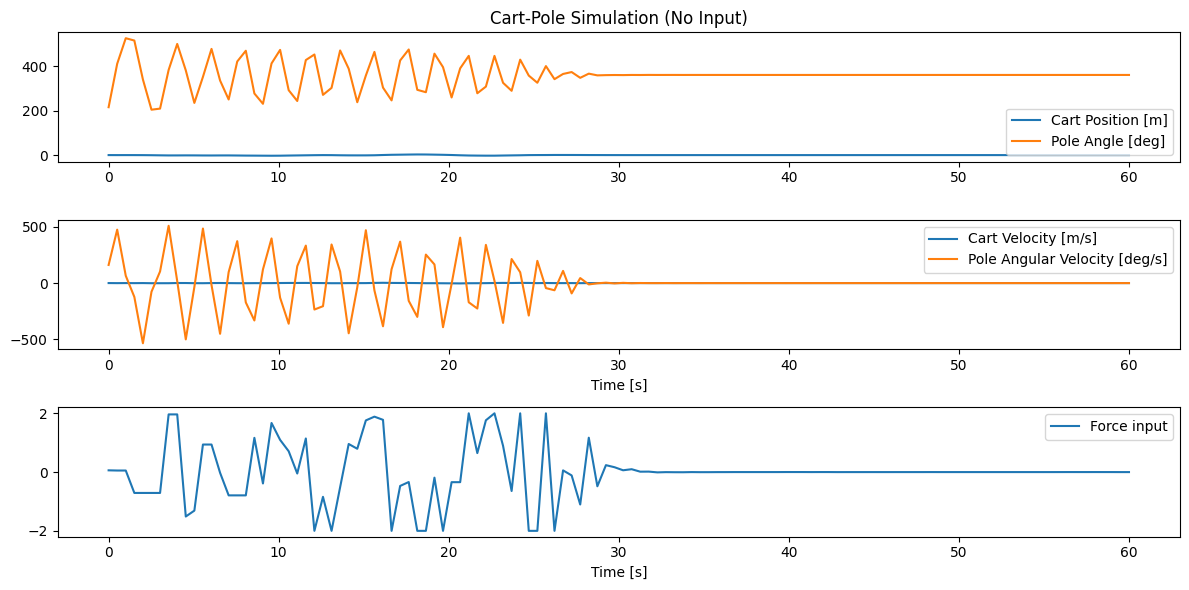

In [287]:
from scipy.optimize import minimize

def cart_pole_nonlin(x, t, u):
    s, ds, theta, dtheta = x
    F = u
    M = 1 # Mass of cart
    m = 0.2 # mass of pole
    l = 0.5 # half length of pole
    g = 9.81
    
    dds = F + m*np.sin(theta)*(l*dtheta**2 + g*np.cos(theta)) / (M + m*np.sin(theta)**2)
    ddtheta = (-F*np.cos(theta) - m*l*dtheta**2 * np.cos(theta)*np.sin(theta) - (M+m)*g*np.sin(theta)) / (l*((M + m*np.sin(theta)**2)))

    dxdt = [ds, dds, dtheta, ddtheta]
    return dxdt

def mpc_cost(u_seq, x0, A, B, N, r_seq, lambda_u):
    cost = 0.0
    x = np.copy(x0)
    for i in range(N):
        u = u_seq[i]
        x = odeint(cart_pole_nonlin, x, [0, dt], args=(u,))[1]
        dx = x - r_seq[i]
        cost += dx.T @ Q @ dx + u**2 * R[0, 0]
    return cost

def solve_mpc(x0, r, A, B, u_star, N=2, lambda_u=0.1):
    r_seq = [r] * N
    u_init = u_star
    bounds = [(-2, 2)] * N
    res = minimize(mpc_cost, u_init, args=(x0, A, B, N, r_seq, lambda_u), bounds=bounds, method='SLSQP')
    us = res.x
    return us

from scipy.integrate import odeint
import numpy as np

ts = np.linspace(0, 60, 120)
xs = np.zeros((4, len(ts)))
us = np.zeros(len(ts))

x = np.array([0.0, 0.0, np.pi + 0.1, 0.02])  # shape (4,)
dt = ts[1] - ts[0]
N = 20
r_seq = [np.zeros_like(x)] * N

us_star = [0] * N
for k, t in enumerate(ts):
    if k == 0:
        pass

    r_target = np.array([0, 0, np.pi, 0])
    us_star = solve_mpc(x, r_target, A, B, us_star, N)
    uk = np.clip(us_star[0], -2.0, 2.0)
    x = odeint(cart_pole_nonlin, x, [0, dt], args=(uk,))[1]
    #x = odeint(cart_pole, x, [ts[k-1], ts[k]])[1]
    xs[:, k] = x
    us[k] = uk

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(ts, xs[0], label='Cart Position [m]')
plt.plot(ts, np.rad2deg(xs[2]), label='Pole Angle [deg]')
plt.title("Cart-Pole Simulation (No Input)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ts, xs[1], label='Cart Velocity [m/s]')
plt.plot(ts, np.rad2deg(xs[3]), label='Pole Angular Velocity [deg/s]')
plt.xlabel("Time [s]")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(ts, us, label='Force input')
plt.xlabel("Time [s]")
plt.legend()

plt.tight_layout()
plt.show()
